# Topicos Avanzados de Inteligencia Artificial
## Instructor: Dr. Luis Felipe Marín Urías
## Facultad de ingeniería Eléctrica y Electrónica
## Universidad Veracruzana

# Vector Gradiente Discreto

Como vimos anteriormente los bordes son variaciones en las intensidades
eso lo podríamos analizar facilmente con los cambios de intensidad en la imagen en X y en Y.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Supongamos que V es una imagen y vamos a atacar el primer renglón de la imagen

In [2]:
# imagen V(0,n) donde n=9 (0 a 8)

V = [3,3,3,8,8,8,3,3,3]

# encontrando las variaciones de intensidad

variaciones = lambda x,y: y-x
res=[0]
for i in range(1,len(V)-1):
    res.append(V[i+1]-V[i])

res


[0, 0, 5, 0, 0, -5, 0, 0]

El arreglo "res" tiene el resultado de las variaciones de intensidades puestas en los valores 5.

Lo podemos ver en el plot siguiente, donde los picos nos dicen donde se encuentran las variaciones

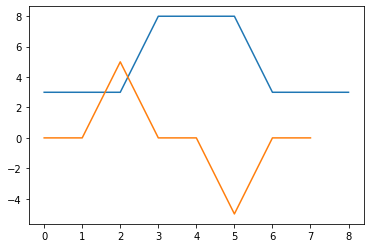

In [3]:
plt.plot(V)
plt.plot(res)

Ahora para una imagen tenemos 2 formas diferentes de encontrar los cambios de intensidades:
- sobre las columnas o eje X (como se ve arriba)
- sobre las filas o eje Y

Al final para obtener el gradiente de cada pixel de la imagen en la posición (m,n) se debe obtener el gradiente sobre el eje $ X = G_x(m,n) $ y  el gradiente sobre el eje $ Y = G_y(m,n) $ tal como vimos en las dispositivas para las esquinas de Harris.

El vector gradiente  es entonces:

$$ \nabla f(m,n)=[G_x(m,n), G_y(m,n)] $$

el cual se representa como una flecha -> de vector

o sea los borde verticales son $G_x$ y los bordes horizontales son $G_y$ y los bordes conjuntos tanto en x como en y se obtiene:

$$ | \nabla f| = \sqrt{G_x^2 + G_y^2} $$

es decir la magnitud del vector, y para obtener su dirección

$$ \tan \theta = \frac{G_x}{G_Y} $$


Veamos un ejemplo en una imagen simple:

(200, 200, 3)

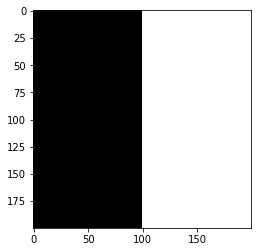

In [4]:
imageblk = np.zeros((200,100,3))
imagewht = np.ones((200,100,3))
image1 = np.concatenate((imageblk,imagewht), axis=1)
#img = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

plt.imshow(image1)
image1.shape

Vamos a sacar el borde vertical en el eje X

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


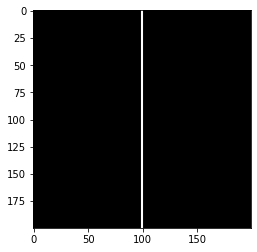

In [5]:
#establecemos el kernel de filtro
filtro_x = np.array([[-1, 0, 1], 
          [-2, 0, 2], 
          [-1, 0, 1]])
#gradiente en X
Gx = cv2.filter2D(image1, -1, filtro_x, borderType=cv2.BORDER_CONSTANT)
plt.imshow(Gx)

Vamos a intentar sacar el borde Horizontal en el eje Y, y veremos que no hay bordes en ese eje

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


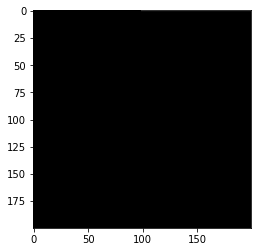

In [6]:
#establecemos el kernel de filtro en y que sería igual a
#[[-1 -2 -1]
# [ 0  0  0]
# [ 1  2  1]]

filtro_y = np.transpose(filtro_x)

#gradiente en Y
Gy = cv2.filter2D(image1, -1, filtro_y, borderType=cv2.BORDER_CONSTANT)
plt.imshow(Gy)

Ahora haremos el mismo procedimiento en una imagen con un solo borde horizontal.

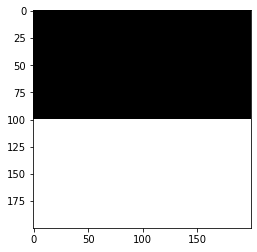

In [7]:
imageblk = np.zeros((100,200,3))
imagewht = np.ones((100,200,3))
image2= np.concatenate((imageblk,imagewht), axis=0)
plt.imshow(image2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


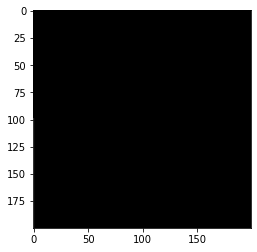

In [8]:

#gradiente en x
Gx = cv2.filter2D(image2, -1, filtro_x, borderType=cv2.BORDER_CONSTANT)
#gradiente en Y
Gy = cv2.filter2D(image2, -1, filtro_y, borderType=cv2.BORDER_CONSTANT)
#mostramos bordes en X
plt.imshow(Gx)
#plt.imshow(np.concatenate((Gx,Gy), axis=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


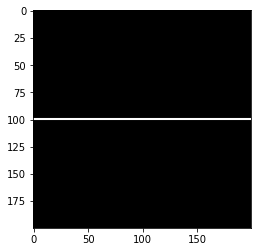

In [9]:
#bordes en y
plt.imshow(Gy)

Ahora lo haremos con una imagen normal

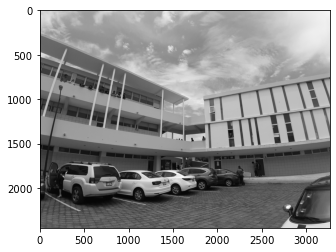

In [10]:
img = cv2.imread("./files/posgrado.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img2)

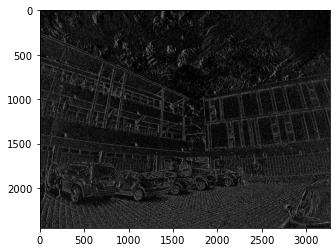

In [11]:
#gradiente en x
Gx = cv2.filter2D(img, -1, filtro_x, borderType=cv2.BORDER_CONSTANT)
#gradiente en Y
Gy = cv2.filter2D(img, -1, filtro_y, borderType=cv2.BORDER_CONSTANT)
plt.imshow(Gx**2,cmap=plt.cm.gray)

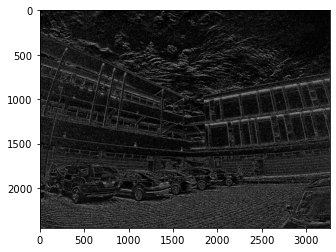

In [12]:
plt.imshow(Gy**2,cmap=plt.cm.gray)


Ahora se muestra la magnitud del gradiente
$$ | \nabla f| = \sqrt{G_x^2 + G_y^2} $$



(2448, 3264)

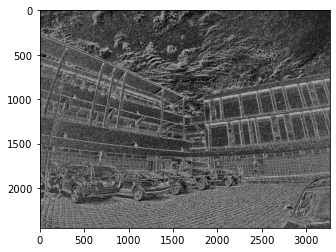

In [13]:
magnitud = np.sqrt(Gx**2 + Gy**2).astype("uint8")
plt.imshow(magnitud,cmap=plt.cm.gray)
magnitud.shape

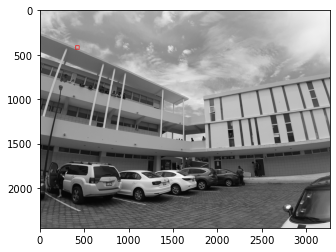

In [14]:
#cv2.rectangle(image, start_point, end_point, color, thickness) 
imsquare = cv2.rectangle(img2[:], (400,400), (440,440), (255,0,0), 5)
plt.imshow(imsquare)

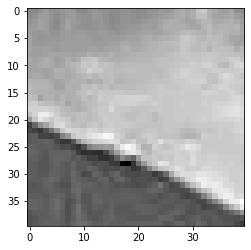

In [15]:
cutimg = img[400:440,400:440]

plt.imshow(cutimg,cmap=plt.cm.gray)

In [16]:
#cv2.arrowedLine(image, start_point, end_point, color, thickness)
gx = cv2.Sobel(img, cv2.CV_64F, 1,0,5)
gy = cv2.Sobel(img, cv2.CV_64F, 0,1,5)
mag,ang = cv2.cartToPolar(gx,gy)
print(mag[420,420],ang[420,420])
print(gx[420,420],gy[420,420])
print(Gx[420,420],Gy[420,420])
flecha=[]
flecha = cv2.arrowedLine(img2[:], (420,420) , (420+Gx[420,420]*5, 420+Gy[420,420]*5), (0,0,255), 1) 


3.162277660168379 0.3218156397342682
3.0 1.0
3 1


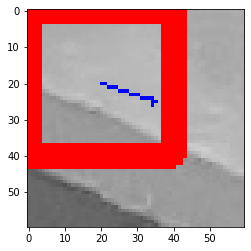

In [17]:
plt.imshow(flecha[400:460,400:460])
